In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [6]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [7]:
data = pd.read_csv('dataset_part_2.csv')
X = pd.read_csv('dataset_part_3.csv')

In [8]:
print(data.columns)
print(X.columns)

Index(['rocket', 'payloads', 'launchpad', 'cores', 'date_utc', 'payload_mass',
       'orbit', 'booster_version', 'launch_site', 'longitude', 'latitude',
       'core_block', 'core_reused_count', 'core_serial', 'core_outcome',
       'core_flights', 'core_gridfins', 'core_reused', 'core_legs',
       'core_landing_pad', 'flight_number', 'landing_class'],
      dtype='object')
Index(['flight_number', 'payload_mass', 'core_flights', 'core_gridfins',
       'core_reused', 'core_legs', 'core_block', 'core_reused_count',
       'orbit_ES-L1', 'orbit_GEO', 'orbit_GTO', 'orbit_HEO', 'orbit_ISS',
       'orbit_LEO', 'orbit_MEO', 'orbit_PO', 'orbit_SO', 'orbit_SSO',
       'orbit_VLEO', 'launch_site_CCSFS SLC 40', 'launch_site_KSC LC 39A',
       'launch_site_VAFB SLC 4E', 'core_landing_pad_5e9e3032383ecb267a34e7c7',
       'core_landing_pad_5e9e3032383ecb554034e7c9',
       'core_landing_pad_5e9e3032383ecb6bb234e7ca',
       'core_landing_pad_5e9e3032383ecb761634e7cb',
       'core_landing_pad

In [9]:
Y = data['landing_class'].to_numpy()

In [10]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
logreg = LogisticRegression()

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

logreg_cv = GridSearchCV(estimator=logreg, param_grid=parameters, cv=10, scoring='accuracy')

logreg_cv.fit(X_train, Y_train)

#Access the best parameters and the best score
best_params = logreg_cv.best_params_
best_score = logreg_cv.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8214285714285714


In [13]:
test_accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


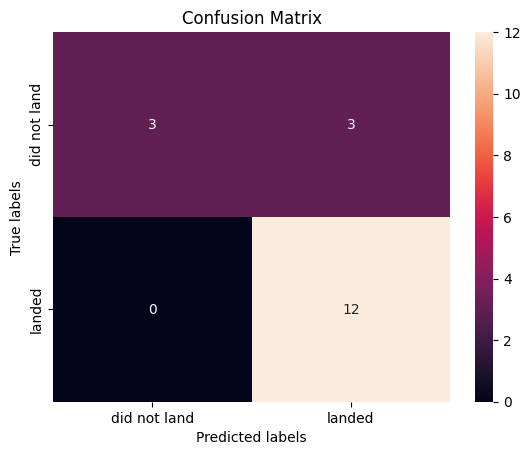

In [14]:
Y_pred = logreg_cv.best_estimator_.predict(X_test)

plot_confusion_matrix(Y_test, Y_pred)

In [15]:
svm = SVC()

parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}


svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring='accuracy')


svm_cv.fit(X_train, Y_train)


best_params = svm_cv.best_params_
best_score = svm_cv.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Best Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy: 0.8482142857142858


In [16]:
test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


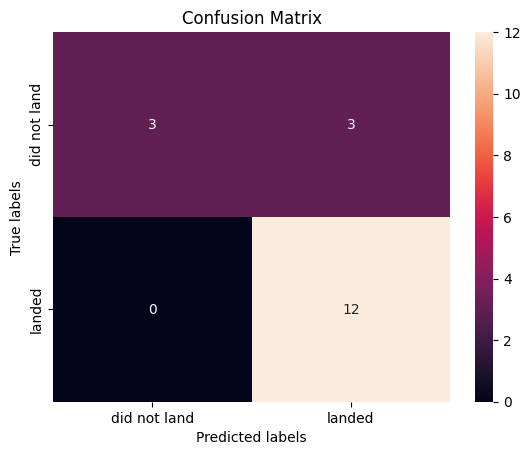

In [17]:
yhat = svm_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)

In [18]:
tree = DecisionTreeClassifier()

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2 * n for n in range(1, 10)],
    'max_features': ['sqrt', 'log2'],  # Corrected 'max_features' options
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}


tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring='accuracy')

tree_cv.fit(X_train, Y_train)

best_params = tree_cv.best_params_
best_score = tree_cv.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.9035714285714285


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [19]:
test_accuracy = tree_cv.score(X_test, Y_test)

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.7222222222222222


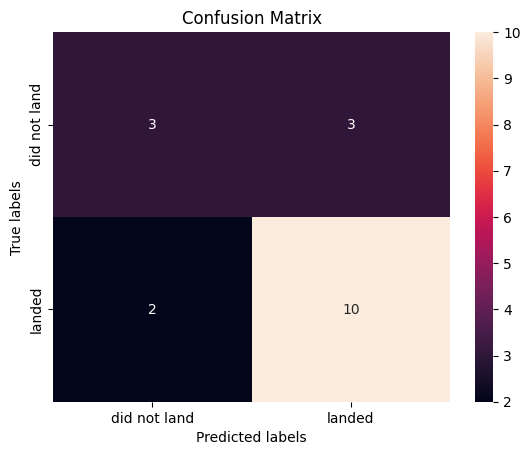

In [20]:
yhat = tree_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)

In [21]:
KNN = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn_cv = GridSearchCV(KNN, parameters, cv=10)

knn_cv.fit(X_train, Y_train)

print("Best Parameters: ", knn_cv.best_params_)

print("Best Cross-Validation Accuracy: ", knn_cv.best_score_)


Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best Cross-Validation Accuracy:  0.8339285714285714


In [22]:
test_accuracy = knn_cv.score(X_test, Y_test)

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.7777777777777778


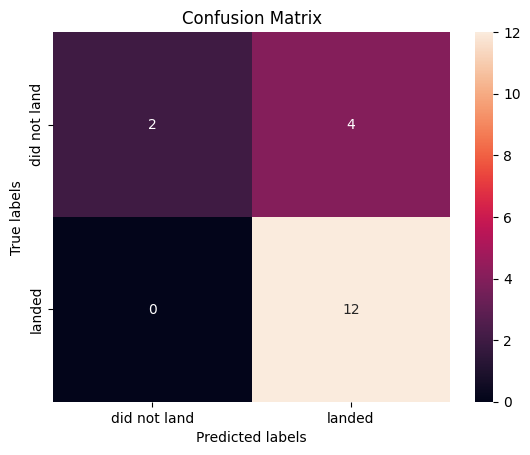

In [23]:
yhat = knn_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred)
    }

metrics_logreg = get_metrics(Y_test, logreg_cv.predict(X_test))
metrics_svm = get_metrics(Y_test, svm_cv.predict(X_test))
metrics_tree = get_metrics(Y_test, tree_cv.predict(X_test))
metrics_knn = get_metrics(Y_test, knn_cv.predict(X_test))

metrics = {
    'Logistic Regression': metrics_logreg,
    'SVM': metrics_svm,
    'Decision Tree': metrics_tree,
    'KNN': metrics_knn
}


metrics_df = pd.DataFrame(metrics).T

print(metrics_df)


                     Accuracy Precision    Recall  F1-Score   ROC-AUC  \
Logistic Regression  0.833333       0.8       1.0  0.888889      0.75   
SVM                  0.833333       0.8       1.0  0.888889      0.75   
Decision Tree        0.722222  0.769231  0.833333       0.8  0.666667   
KNN                  0.777778      0.75       1.0  0.857143  0.666667   

                      Confusion Matrix  
Logistic Regression  [[3, 3], [0, 12]]  
SVM                  [[3, 3], [0, 12]]  
Decision Tree        [[3, 3], [2, 10]]  
KNN                  [[2, 4], [0, 12]]  
